In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

countries_climate = pd.read_csv('data/climate_countries.csv')
countries_climate.head()

,Country,Climate zone,Avg °C
0,Afghanistan,DSB,15.70
1,Albania,CSB,15.17
2,Algeria,BWH,20.00
3,American Samoa,AW,28.00
4,Andorra,CFB,7.17


In [80]:
countries_climate.Country.unique().__len__()

246

In [81]:
countries_climate.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', "Cote D'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial 

In [82]:
countries_boundaries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

diff_name_1 = countries_boundaries[np.isin(countries_boundaries.name, countries_climate.Country, invert=True)]
diff_name_2 = countries_climate[np.isin(countries_climate.Country, countries_boundaries.name, invert=True)] 

print(diff_name_1.name)


2                     W. Sahara
4      United States of America
11              Dem. Rep. Congo
17               Dominican Rep.
19                      Bahamas
20                 Falkland Is.
23       Fr. S. Antarctic Lands
60                Côte d'Ivoire
66         Central African Rep.
67                        Congo
69                   Eq. Guinea
73                     eSwatini
80                       Gambia
135                 Solomon Is.
159                  Antarctica
160                   N. Cyprus
167                  Somaliland
170            Bosnia and Herz.
176                    S. Sudan
Name: name, dtype: object


C:\Users\JPMONIATTE\AppData\Local\Temp\ipykernel_15760\4215519175.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries_boundaries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [83]:
print(diff_name_2.Country[10:22])

28      British Indian Ocean Territory
29              British Virgin Islands
37                          Cape Verde
38                      Cayman Islands
39            Central African Republic
43                    Christmas Island
44             Cocos (Keeling) Islands
46                             Comoros
47                        Cook Islands
49                       Cote D'Ivoire
52                             Curacao
55    Democratic Republic of the Congo
Name: Country, dtype: object


In [84]:
#rename United States of America to United States
countries_boundaries = countries_boundaries.replace('United States of America', 'United States')


<class 'geopandas.geodataframe.GeoDataFrame'>


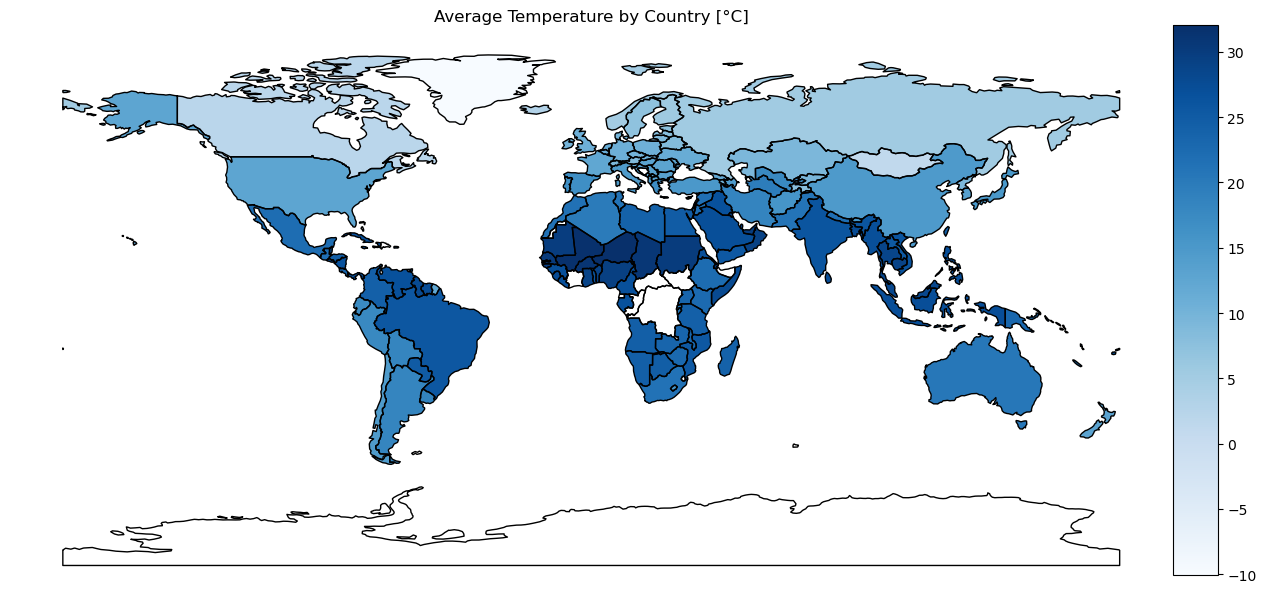

In [85]:
#merge the two dataframes by Country and name
world_climate = countries_boundaries.merge(countries_climate, left_on='name', right_on='Country', how='left')
print(type(world_climate))

#plot the world map with color by temperature
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.title('Average Temperature by Country [°C]')
world_climate.boundary.plot(ax=ax, linewidth=1, color='black')  # Draw country boundaries
ax.set_axis_off()
world_climate.plot(column='Avg °C', ax=ax, legend=True, cmap='Blues', cax=fig.add_axes([0.9, 0.23, 0.03, 0.55]))
plt.show()


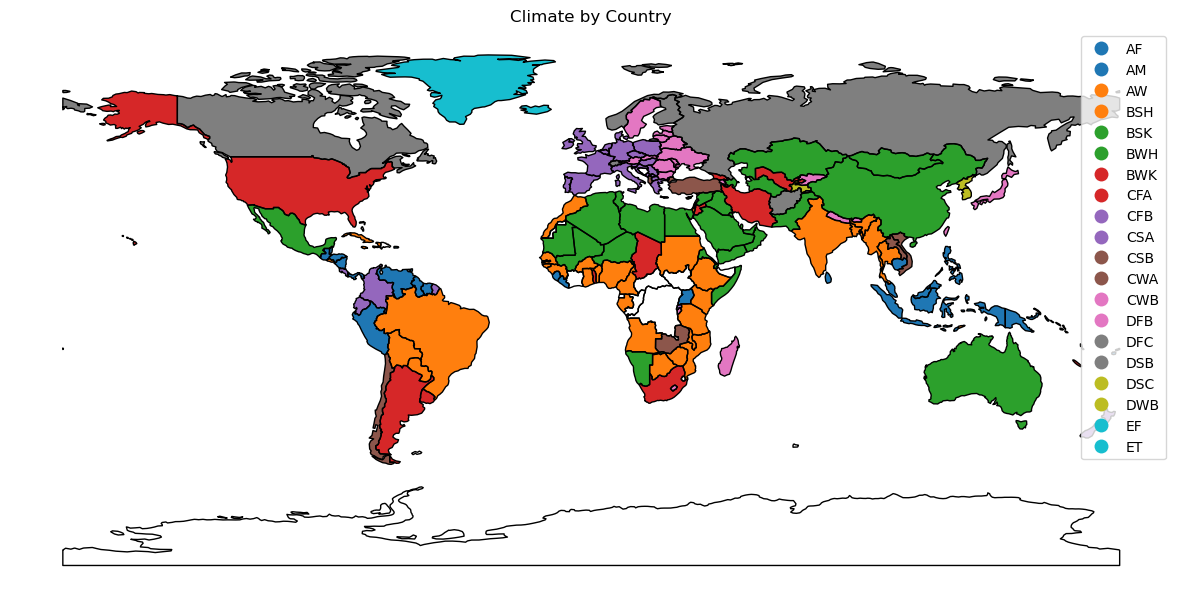

In [94]:
#plot the world map with color by temperature
color_mapping = {
    'AF' : (0, 0, 255),
    'AM' : (0, 120, 255),
    'AW' : (70, 170, 255),
    'BSH' : (245, 165, 0),
    'BSK' : (255, 220, 100),
    'BWH' : (255, 0, 0),
    'BWK' : (255, 150, 150),
    'CFA' : (200, 255, 80),
    'CFB' : (100, 255, 80),
    'CSA' : (255, 255, 0),
    'CSB' : (200, 200, 0),
    'CWA' : (150, 255, 150),
    'CWB' : (100, 200, 100),
    'DFB' : (55, 200, 255),
    'DFC' : (0, 125, 125),
    'DSB' : (200, 0, 200),
    'DSC' : (150, 50, 150),
    'DWB' : (90, 120, 220),
    'EF' : (102, 102, 102),
    'ET' : (178, 178, 178),
}

#convert colors into rgba
for key, value in color_mapping.items():
    color_mapping[key] = (value[0]/255, value[1]/255, value[2]/255)

world_climate['color'] = world_climate.loc[:, 'Climate zone'].map(color_mapping)
# world_climate['color'] = world_climate['color'].map(color_mapping)


fig, ax = plt.subplots(1, figsize=(15, 10))
plt.title('Climate by Country')
world_climate.boundary.plot(ax=ax, linewidth=1, color='black')  # Draw country boundaries
ax.set_axis_off()
world_climate.plot(column='Climate zone', ax=ax, legend=True)
plt.show()

In [ ]:
from afinn import Afinn
afn = Afinn()